In [3]:
import cv2
import os
import numpy as np

# Folder containing extracted images
folder_path = folder_path = os.path.join(os.getcwd(), "../Resources/Dental_Images/Dental_Images/")


def calculate_clarity(image):
    try:  #convert to gray scale and apply laplacian operator to detect the edges
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        return laplacian_var
    except Exception as e:
        print(f"Error calculating clarity: {e}")
        return 0  

def scan_images(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        print(filename) # printing filename
        
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # print(f"Failed to Load the Images in : {image_path}")
                clarity = calculate_clarity(image)
                height, width,_= image.shape
                results.append({
                    'filename': filename,
                    'clarity': clarity,
                    'resolution': (width, height),
                    'path': image_path
                })
    return results


# Print results
image_results = scan_images(folder_path)
i = 1
for result in image_results:
    print(f"Sl.No {i}, Image: {result['filename']}, Clarity: {result['clarity']:.2f}, Resolution: {result['resolution']}")
    i=i+1

63.jpg
88.jpg
89.jpg
163.jpg
188.jpg
62.jpg
74.jpg
48.jpg
148.jpg
49.jpg
75.jpg
71.jpg
65.jpg
158.jpg
image8.jpg
image9.jpg
159.jpg
165.jpg
64.jpg
70.jpg
72.jpg
167.jpg
99.jpg
210.jpg
98.jpg
73.jpg
67.jpg
9.jpg
14.jpg
115.jpg
114.jpg
17.jpg
116.jpg
12.jpg
113.jpg
13.jpg
39.jpg
110.jpg
image10.jpg
111.jpg
38.jpg
35.jpg
120.jpg
34.jpg
20.jpg
36.jpg
22.jpg
137.jpg
123.jpg
122.jpg
136.jpg
23.jpg
37.jpg
33.jpg
27.jpg
127.jpg
26.jpg
32.jpg
18.jpg
24.jpg
30.jpg
130.jpg
31.jpg
25.jpg
19.jpg
4.jpg
56.jpg
81.jpg
95.jpg
image7.jpg
image6.jpg
156.jpg
142.jpg
80.jpg
5.jpg
57.jpg
55.jpg
7.jpg
41.jpg
69.jpg
96.jpg
168.jpg
82.jpg
154.jpg
image4.jpg
image5.jpg
141.jpg
155.jpg
83.jpg
169.jpg
68.jpg
40.jpg
54.jpg
78.jpg
186.jpg
2.jpg
44.jpg
151.jpg
145.jpg
93.jpg
86.jpg
178.jpg
144.jpg
150.jpg
45.jpg
3.jpg
51.jpg
53.jpg
152.jpg
90.jpg
images.jpg
Image2.jpg
image.jpg
image3.jpg
85.jpg
147.jpg
52.jpg
46.jpg
Sl.No 1, Image: 63.jpg, Clarity: 1511.83, Resolution: (253, 199)
Sl.No 2, Image: 88.jpg, Clarity: 71

In [18]:
import numpy as np
# extract the clarity values from the results
clarity_values=[]
for img in image_results:
    clarity_values.append(img['clarity'])
    
min_clarity = np.min(clarity_values)
max_clarity = np.max(clarity_values)
med_clarity = np.median(clarity_values)

print(f"Minimum Clarity: {min_clarity:.2f}")
print(f"Maximum Clarity: {max_clarity:.2f}")
print(f"Median Clarity: {med_clarity:.2f}")



Minimum Clarity: 21.22
Maximum Clarity: 3728.69
Median Clarity: 250.26


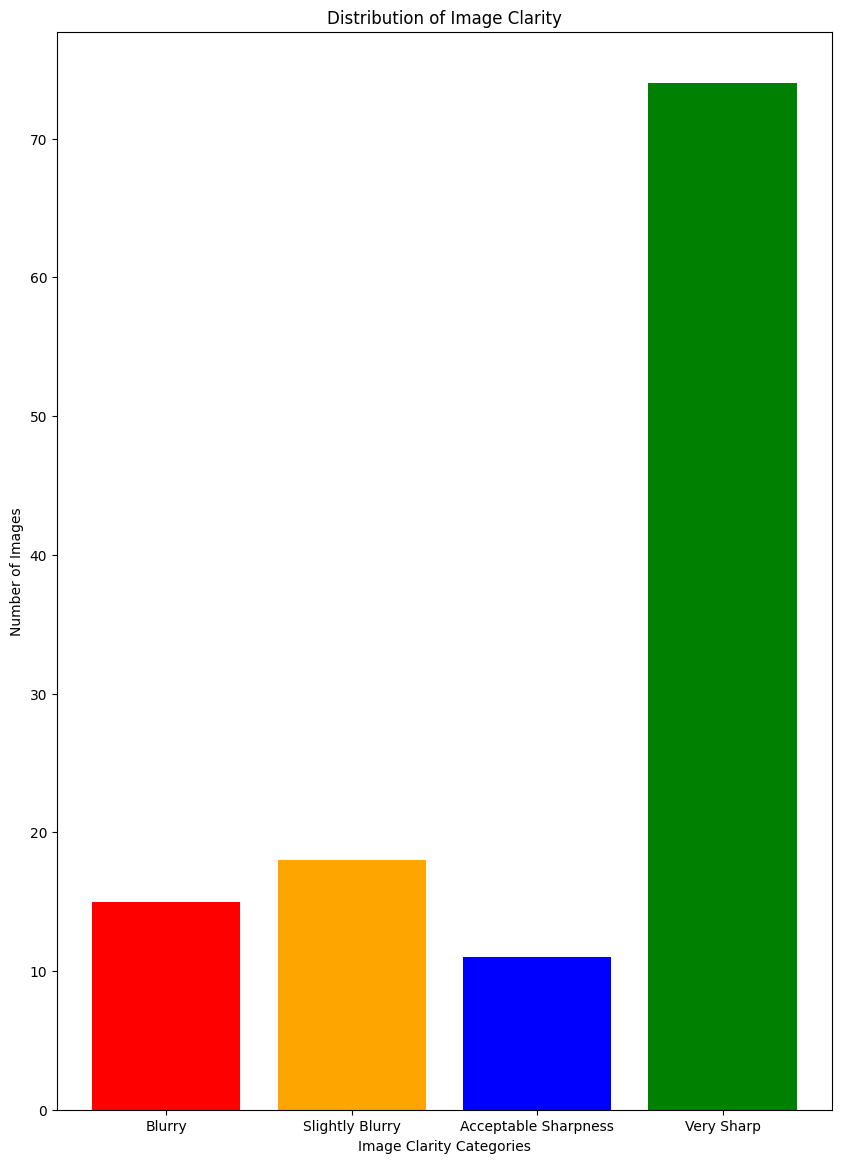

In [44]:
import matplotlib.pyplot as plt

blurry = []
slightly_blurry = []
acceptable_sharpness = []
very_sharp = []

for img in clarity_values:
    if img < 50:
        blurry.append(img)
    elif 50 <= img < 100:
        slightly_blurry.append(img)
    elif 100 <= img < 150:
        acceptable_sharpness.append(img)
    else:
        very_sharp.append(img)
    
    
categories = ["Blurry", "Slightly Blurry", "Acceptable Sharpness", "Very Sharp"]
counts = [len(blurry), len(slightly_blurry), len(acceptable_sharpness), len(very_sharp)]

        
plt.figure(figsize=(10, 14))
plt.bar(categories, counts, color=colors)
# plt.bar(color=['red', 'orange', 'blue', 'green'])
plt.xlabel("Image Clarity Categories")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Clarity")
plt.show()